In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/recurrent3/Capture2.PNG
/kaggle/input/recurrent6/Capture6.PNG
/kaggle/input/recurrent1/Capture.PNG
/kaggle/input/recurrent5/Capture5.PNG
/kaggle/input/recurrent7/Capture7.PNG
/kaggle/input/recurrent9/Capture9.PNG
/kaggle/input/recurrent2/Capture1.PNG
/kaggle/input/recurrent8/Capture8.PNG
/kaggle/input/recurrent4/Capture4.PNG


applying RNNs to a variety of problems: speech recognition, language modeling, translation, image captioning

<fontcolor:"blue">
****
Humans don’t start their thinking from scratch every second. As you read this essay, you understand each word based on your understanding of previous words. You don’t throw everything away and start thinking from scratch again. Your thoughts have persistence.

Traditional neural networks can’t do this, and it seems like a major shortcoming. 

In [2]:
import matplotlib.pyplot as plt

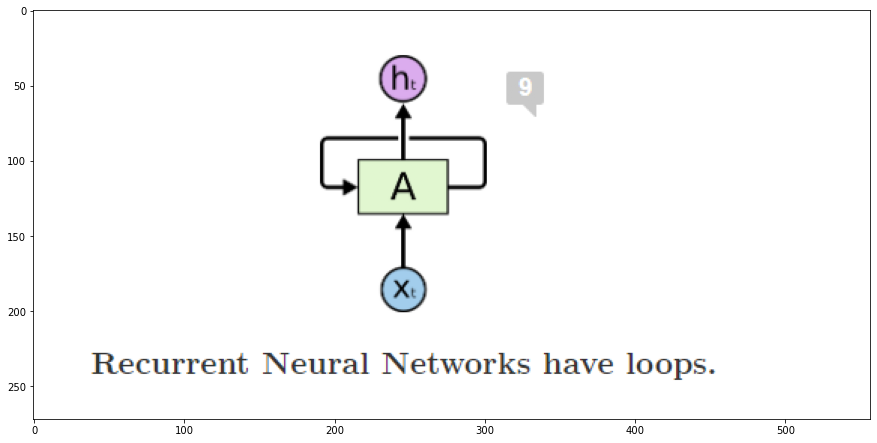

In [3]:
plt.figure(figsize=(15,10))
plt.imshow(plt.imread("../input/recurrent1/Capture.PNG"))

Recurrent neural networks address this issue. They are networks with loops in them, allowing information to persist.

In the above diagram, a chunk of neural network, A, looks at some input xt and outputs a value ht. A loop allows information to be passed from one step of the network to the next.

These loops make recurrent neural networks seem kind of mysterious. However, if you think a bit more, it turns out that they aren’t all that different than a normal neural network. A recurrent neural network can be thought of as multiple copies of the same network, each passing a message to a successor. 

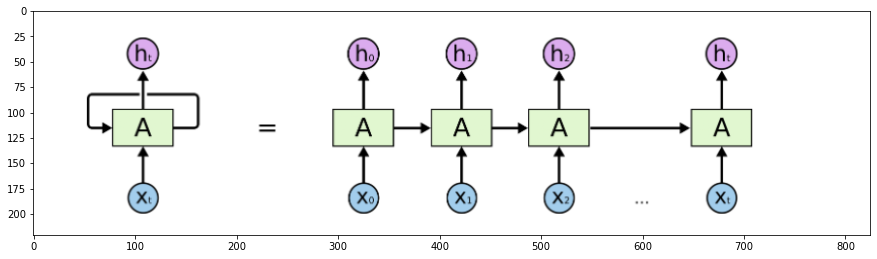

In [4]:
plt.figure(figsize=(15,10))
plt.imshow(plt.imread("../input/recurrent2/Capture1.PNG"))

This chain-like nature reveals that recurrent neural networks are intimately related to sequences and lists. They’re the natural architecture of neural network to use for such data

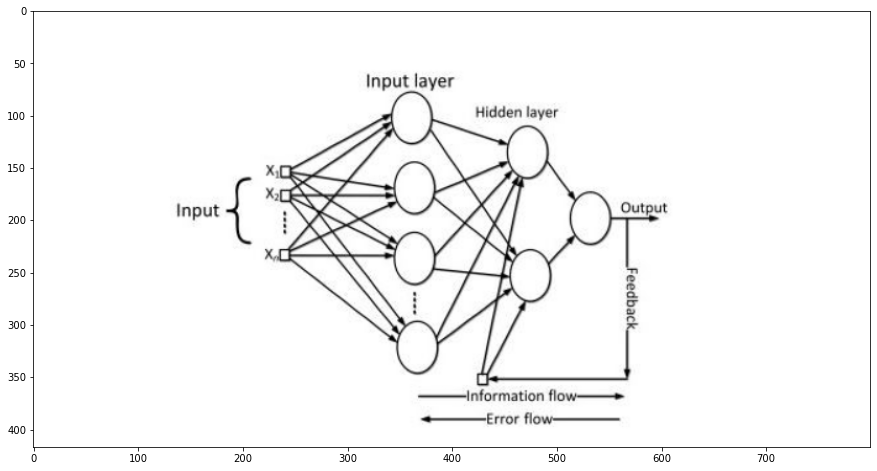

In [5]:
plt.figure(figsize=(15,10))
plt.imshow(plt.imread("../input/recurrent3/Capture2.PNG"))

The Problem of Long-Term Dependencies:

Sometimes, we only need to look at recent information to perform the present task. For example, consider a language model trying to predict the next word based on the previous ones. If we are trying to predict the last word in “the clouds are in the sky,” we don’t need any further context – it’s pretty obvious the next word is going to be sky. In such cases, where the gap between the relevant information and the place that it’s needed is small, RNNs can learn to use the past information.

But there are also cases where we need more context. Consider trying to predict the last word in the text “I grew up in France… I speak fluent French.” Recent information suggests that the next word is probably the name of a language, but if we want to narrow down which language, we need the context of France, from further back. It’s entirely possible for the gap between the relevant information and the point where it is needed to become very large.

Unfortunately, as that gap grows, RNNs become unable to learn to connect the information.

Long Short Term Memory networks (LSTM):

Long Short Term Memory networks – usually just called “LSTMs” – are a special kind of RNN, capable of learning long-term dependencies.

LSTMs are explicitly designed to avoid the long-term dependency problem. Remembering information for long periods of time is practically their default behavior, not something they struggle to learn!



All recurrent neural networks have the form of a chain of repeating modules of neural network. In standard RNNs, this repeating module will have a very simple structure, such as a single tanh layer

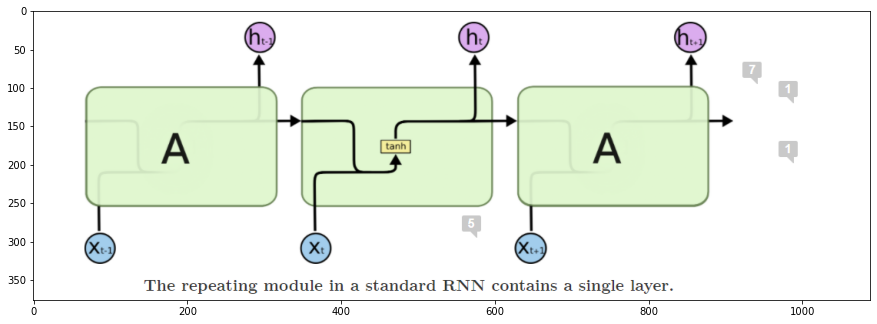

In [6]:
plt.figure(figsize=(15,10))
plt.imshow(plt.imread("../input/recurrent4/Capture4.PNG"))

LSTMs also have this chain like structure, but the repeating module has a different structure. Instead of having a single neural network layer, there are four, interacting in a very special way.


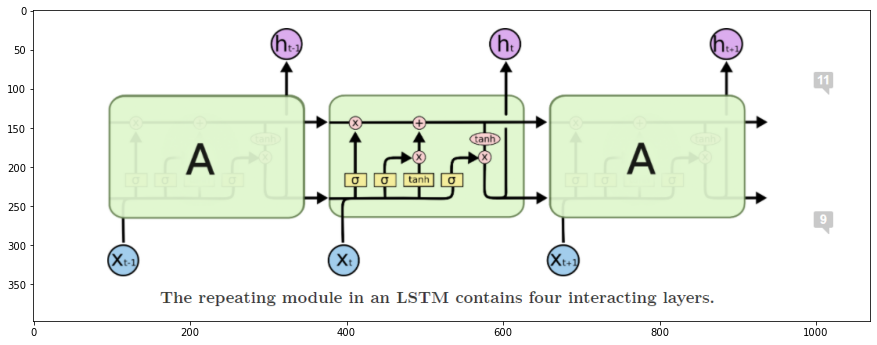

In [7]:
plt.figure(figsize=(15,10))
plt.imshow(plt.imread("../input/recurrent5/Capture5.PNG"))

In the above diagram, each line carries an entire vector, from the output of one node to the inputs of others. The pink circles represent pointwise operations, like vector addition, while the yellow boxes are learned neural network layers.

The LSTM does have the ability to remove or add information to the cell state, carefully regulated by structures called gates.

Gates are a way to optionally let information through. They are composed out of a sigmoid neural net layer and a pointwise multiplication operation.

The sigmoid layer outputs numbers between zero and one, describing how much of each component should be let through. A value of zero means “let nothing through,” while a value of one means “let everything through!”

An LSTM has three of these gates, to protect and control the cell state.

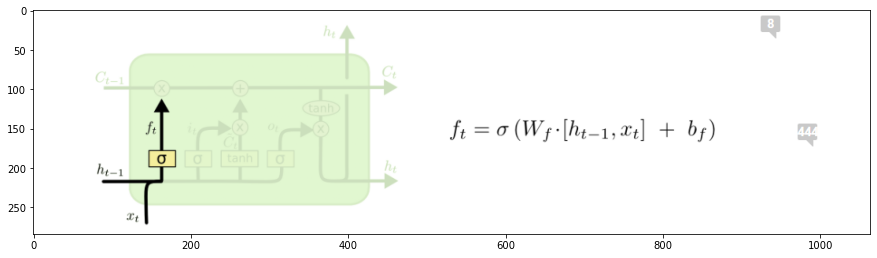

In [8]:
plt.figure(figsize=(15,10))
plt.imshow(plt.imread("../input/recurrent6/Capture6.PNG"))

The first step in our LSTM is to decide what information we’re going to throw away from the cell state. This decision is made by a sigmoid layer called the “forget gate layer.” It looks at ht−1 and xt, and outputs a number between 0 and 1 for each number in the cell state Ct−1. A 1 represents “completely keep this” while a 0 represents “completely get rid of this.”

Let’s go back to our example of a language model trying to predict the next word based on all the previous ones. In such a problem, the cell state might include the gender of the present subject, so that the correct pronouns can be used. When we see a new subject, we want to forget the gender of the old subject.



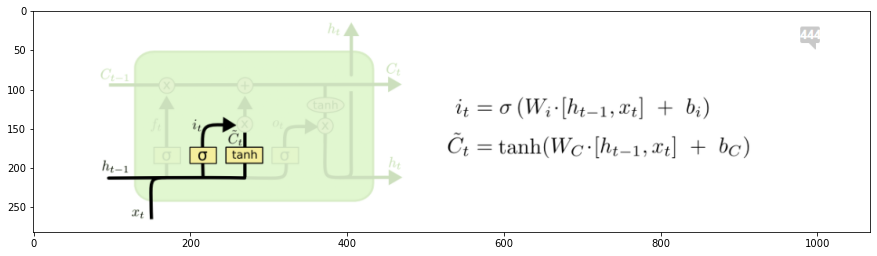

In [9]:
plt.figure(figsize=(15,10))
plt.imshow(plt.imread("../input/recurrent7/Capture7.PNG"))

The next step is to decide what new information we’re going to store in the cell state. This has two parts. First, a sigmoid layer called the “input gate layer” decides which values we’ll update. Next, a tanh layer creates a vector of new candidate values, C~t, that could be added to the state. In the next step, we’ll combine these two to create an update to the state.

In the example of our language model, we’d want to add the gender of the new subject to the cell state, to replace the old one we’re forgetting.

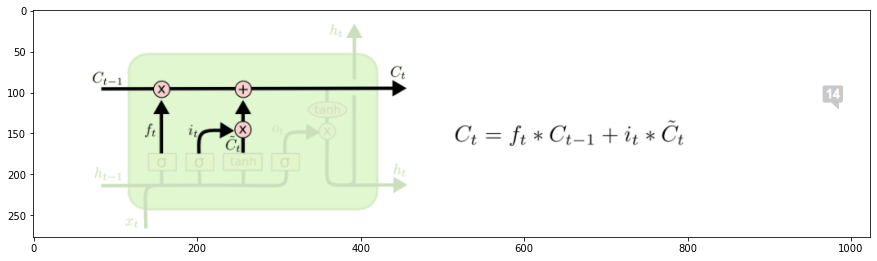

In [10]:
plt.figure(figsize=(15,10))
plt.imshow(plt.imread("../input/recurrent8/Capture8.PNG"))

It’s now time to update the old cell state, Ct−1, into the new cell state Ct.

We multiply the old state by ft, forgetting the things we decided to forget earlier. Then we add it∗C~t. This is the new candidate values, scaled by how much we decided to update each state value.

In the case of the language model, this is where we’d actually drop the information about the old subject’s gender and add the new information, as we decided in the previous steps.

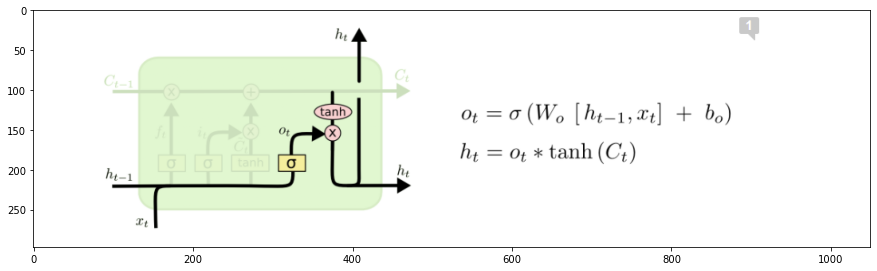

In [11]:
plt.figure(figsize=(15,10))
plt.imshow(plt.imread("../input/recurrent9/Capture9.PNG"))

Finally, we need to decide what we’re going to output. This output will be based on our cell state, but will be a filtered version. First, we run a sigmoid layer which decides what parts of the cell state we’re going to output. Then, we put the cell state through tanh (to push the values to be between −1 and 1) and multiply it by the output of the sigmoid gate, so that we only output the parts we decided to.

For the language model example, since it just saw a subject, it might want to output information relevant to a verb, in case that’s what is coming next. For example, it might output whether the subject is singular or plural, so that we know what form a verb should be conjugated into if that’s what follows next.

In [12]:
pip install nlp

     |████████████████████████████████| 1.7 MB 4.5 MB/s 
     |████████████████████████████████| 243 kB 34.5 MB/s 
Note: you may need to restart the kernel to use updated packages.


In [13]:
import nlp

In [14]:
data=nlp.load_dataset("emotion")
data

Downloading:   0%|          | 0.00/3.41k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/6.01k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.66M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/204k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/207k [00:00<?, ?B/s]

|          | 0/0 [00:00<?, ? examples/s]

|          | 0/0 [00:00<?, ? examples/s]

|          | 0/0 [00:00<?, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/emotion/default/0.0.0/84e07cd366f4451464584cdbd4958f512bcaddb1e921341e07298ce8a9ce42f4. Subsequent calls will reuse this data.


{'train': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 16000),
 'validation': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000),
 'test': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000)}

In [15]:
train=data["train"]
train["text"]

['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'im grabbing a minute to post i feel greedy wrong',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
 'i am feeling grouchy',
 'ive been feeling a little burdened lately wasnt sure why that was',
 'ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny',
 'i feel as confused about life as a teenager or as jaded as a year old man',
 'i have been with petronas for years i feel that petronas has performed well and made a huge profit',
 'i feel romantic too',
 'i feel like i have to make the suffering i m seeing mean something',
 'i do feel that running is a divine experience and that i can expect to have some type of spiritual encounter',
 'i think it s the easiest time of year to feel dissatisfied',
 'i feel low energy i m just thirst

In [16]:
train["label"]

['sadness',
 'sadness',
 'anger',
 'love',
 'anger',
 'sadness',
 'surprise',
 'fear',
 'joy',
 'love',
 'sadness',
 'joy',
 'anger',
 'sadness',
 'joy',
 'joy',
 'sadness',
 'sadness',
 'sadness',
 'fear',
 'anger',
 'fear',
 'joy',
 'joy',
 'anger',
 'sadness',
 'sadness',
 'sadness',
 'anger',
 'joy',
 'joy',
 'fear',
 'surprise',
 'anger',
 'joy',
 'joy',
 'joy',
 'joy',
 'anger',
 'joy',
 'joy',
 'joy',
 'joy',
 'joy',
 'sadness',
 'sadness',
 'joy',
 'love',
 'joy',
 'anger',
 'joy',
 'sadness',
 'anger',
 'fear',
 'joy',
 'sadness',
 'sadness',
 'surprise',
 'joy',
 'joy',
 'joy',
 'love',
 'fear',
 'fear',
 'surprise',
 'anger',
 'anger',
 'sadness',
 'love',
 'joy',
 'sadness',
 'sadness',
 'joy',
 'sadness',
 'sadness',
 'sadness',
 'joy',
 'joy',
 'joy',
 'anger',
 'sadness',
 'anger',
 'anger',
 'anger',
 'joy',
 'joy',
 'joy',
 'joy',
 'sadness',
 'fear',
 'love',
 'anger',
 'sadness',
 'anger',
 'love',
 'sadness',
 'joy',
 'joy',
 'sadness',
 'anger',
 'love',
 'joy',
 '

In [17]:
test=data["test"]
test

Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000)

In [18]:
validation=data["validation"]
validation

Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000)

In [19]:
def get_tweet(tweets):
    tweet=[x["text"] for x in tweets]
    label=[x["label"] for x in tweets]
    return tweet, label

In [20]:
tweets, labels=get_tweet(train)
print(tweets[0],labels[0])

i didnt feel humiliated sadness


In [21]:
val_tweets,val_labels=get_tweet(validation)
print(val_tweets[0],val_labels[0])

im feeling quite sad and sorry for myself but ill snap out of it soon sadness


In [22]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [23]:
tokenizer=Tokenizer(num_words=10000,oov_token="<UNK>")

In [24]:
tokenizer.fit_on_texts(tweets)

In [25]:
tokenizer.texts_to_sequences([tweets[0]])

[[2, 139, 3, 679]]

In [26]:
tweets[0]

'i didnt feel humiliated'

In [27]:
tokenizer.texts_to_sequences([tweets[1]])

[[2,
  40,
  101,
  60,
  8,
  15,
  494,
  5,
  15,
  3496,
  553,
  32,
  60,
  61,
  128,
  148,
  76,
  1480,
  4,
  22,
  1255]]

In [28]:
tweets[1]

'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake'

In [29]:
new_tweets=tokenizer.texts_to_sequences(tweets)
new_tweets

[[2, 139, 3, 679],
 [2,
  40,
  101,
  60,
  8,
  15,
  494,
  5,
  15,
  3496,
  553,
  32,
  60,
  61,
  128,
  148,
  76,
  1480,
  4,
  22,
  1255],
 [17, 3060, 7, 1149, 5, 286, 2, 3, 495, 438],
 [2, 24, 165, 8, 665, 27, 6, 4158, 2, 59, 47, 9, 13, 22, 72, 30, 6, 3497],
 [2, 24, 8, 1065],
 [73, 48, 8, 7, 56, 521, 319, 328, 158, 161, 9, 20],
 [73,
  48,
  329,
  35,
  7401,
  35,
  196,
  7402,
  888,
  4,
  73,
  2475,
  1384,
  7,
  159,
  1885,
  19,
  2,
  117,
  3,
  14,
  15,
  455],
 [2, 3, 29, 439, 27, 78, 29, 7, 1686, 35, 29, 760, 29, 7, 193, 267, 374],
 [2,
  21,
  48,
  25,
  5260,
  16,
  215,
  2,
  3,
  9,
  5260,
  99,
  5261,
  135,
  4,
  132,
  7,
  1038,
  4159],
 [2, 3, 666, 94],
 [2, 3, 14, 2, 21, 5, 80, 6, 733, 2, 93, 544, 304, 84],
 [2,
  39,
  3,
  9,
  483,
  22,
  7,
  530,
  440,
  4,
  9,
  2,
  40,
  920,
  5,
  21,
  69,
  840,
  10,
  1886,
  3061],
 [2, 70, 13, 90, 6, 5262, 52, 10, 193, 5, 3, 610],
 [2, 3, 339, 456, 2, 93, 32, 4160],
 [2,
  21,
  4161,

In [30]:
new_val_tweets=tokenizer.texts_to_sequences(val_tweets)
new_val_tweets

[[17, 8, 157, 260, 4, 343, 16, 51, 19, 212, 1, 50, 10, 13, 533],
 [2, 3, 14, 2, 24, 72, 253, 33, 7, 618, 2743, 618, 1418, 10, 1104],
 [2, 3, 14, 7, 614, 1],
 [2, 24, 32, 8, 559, 4, 1313],
 [2, 40, 21, 16, 7, 1274, 35, 49, 2, 24, 8, 643],
 [2, 213, 5, 3, 38, 887, 10, 54, 242, 99, 274, 16, 18],
 [2, 24, 8, 38, 389, 9, 82, 59, 28, 199, 5, 183, 312, 10, 23, 463],
 [2, 3, 603, 432, 32, 5, 28, 199, 5, 280, 5, 68],
 [2, 3, 151, 995, 27, 6, 2585, 147, 97],
 [2, 3, 627, 4, 406, 16, 355, 9],
 [2, 3, 671, 19, 26, 694, 218],
 [2, 20, 1, 30, 7449, 1393, 1609, 253, 50, 10, 6, 1325, 4, 8, 46, 154],
 [2, 409, 42, 231, 141, 42, 128, 24, 8, 1, 5131, 4, 588],
 [2, 20, 8, 890],
 [2,
  839,
  50,
  10,
  81,
  77,
  693,
  4,
  4438,
  825,
  787,
  8,
  14,
  2,
  57,
  48,
  578,
  25,
  7,
  1892,
  4,
  125,
  6715,
  30,
  6,
  9424,
  4,
  1],
 [2,
  145,
  254,
  8,
  334,
  29,
  5,
  1796,
  25,
  217,
  2,
  2125,
  51,
  432,
  37,
  2,
  127,
  26,
  3061,
  1,
  1,
  4,
  2,
  127,
  26,
  21,

Preparing the Labels:

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
sns.set_style("darkgrid")

(array([4666.,    0., 2159.,    0., 1304.,    0.,  572.,    0., 1937.,
        5362.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

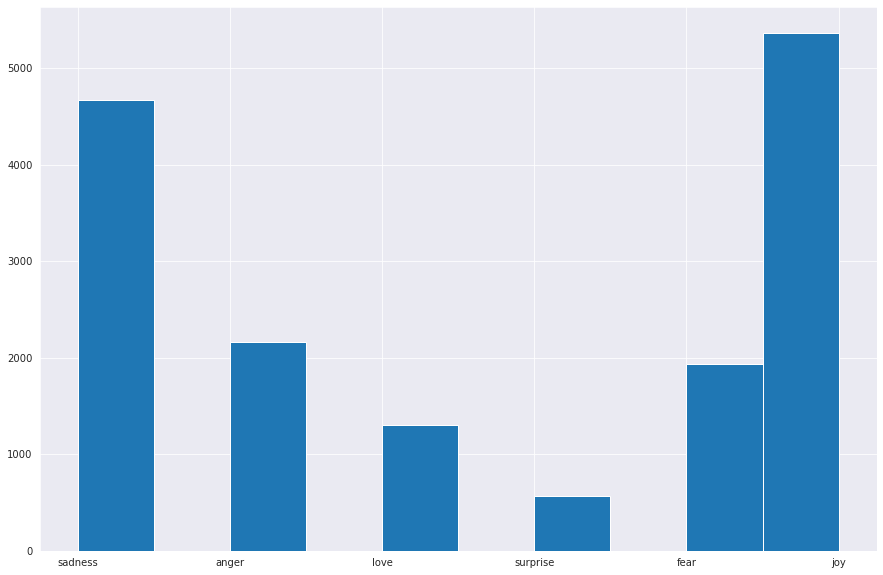

In [33]:
plt.figure(figsize=(15,10))
plt.hist(labels)

In [34]:
labels

['sadness',
 'sadness',
 'anger',
 'love',
 'anger',
 'sadness',
 'surprise',
 'fear',
 'joy',
 'love',
 'sadness',
 'joy',
 'anger',
 'sadness',
 'joy',
 'joy',
 'sadness',
 'sadness',
 'sadness',
 'fear',
 'anger',
 'fear',
 'joy',
 'joy',
 'anger',
 'sadness',
 'sadness',
 'sadness',
 'anger',
 'joy',
 'joy',
 'fear',
 'surprise',
 'anger',
 'joy',
 'joy',
 'joy',
 'joy',
 'anger',
 'joy',
 'joy',
 'joy',
 'joy',
 'joy',
 'sadness',
 'sadness',
 'joy',
 'love',
 'joy',
 'anger',
 'joy',
 'sadness',
 'anger',
 'fear',
 'joy',
 'sadness',
 'sadness',
 'surprise',
 'joy',
 'joy',
 'joy',
 'love',
 'fear',
 'fear',
 'surprise',
 'anger',
 'anger',
 'sadness',
 'love',
 'joy',
 'sadness',
 'sadness',
 'joy',
 'sadness',
 'sadness',
 'sadness',
 'joy',
 'joy',
 'joy',
 'anger',
 'sadness',
 'anger',
 'anger',
 'anger',
 'joy',
 'joy',
 'joy',
 'joy',
 'sadness',
 'fear',
 'love',
 'anger',
 'sadness',
 'anger',
 'love',
 'sadness',
 'joy',
 'joy',
 'sadness',
 'anger',
 'love',
 'joy',
 '

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
le= LabelEncoder()

In [37]:
labels=le.fit_transform(labels)
labels

array([4, 4, 0, ..., 2, 0, 4])

In [38]:
val_labels=le.transform(val_labels)
val_labels

array([4, 4, 3, ..., 2, 2, 2])

In [39]:
new_tweets

[[2, 139, 3, 679],
 [2,
  40,
  101,
  60,
  8,
  15,
  494,
  5,
  15,
  3496,
  553,
  32,
  60,
  61,
  128,
  148,
  76,
  1480,
  4,
  22,
  1255],
 [17, 3060, 7, 1149, 5, 286, 2, 3, 495, 438],
 [2, 24, 165, 8, 665, 27, 6, 4158, 2, 59, 47, 9, 13, 22, 72, 30, 6, 3497],
 [2, 24, 8, 1065],
 [73, 48, 8, 7, 56, 521, 319, 328, 158, 161, 9, 20],
 [73,
  48,
  329,
  35,
  7401,
  35,
  196,
  7402,
  888,
  4,
  73,
  2475,
  1384,
  7,
  159,
  1885,
  19,
  2,
  117,
  3,
  14,
  15,
  455],
 [2, 3, 29, 439, 27, 78, 29, 7, 1686, 35, 29, 760, 29, 7, 193, 267, 374],
 [2,
  21,
  48,
  25,
  5260,
  16,
  215,
  2,
  3,
  9,
  5260,
  99,
  5261,
  135,
  4,
  132,
  7,
  1038,
  4159],
 [2, 3, 666, 94],
 [2, 3, 14, 2, 21, 5, 80, 6, 733, 2, 93, 544, 304, 84],
 [2,
  39,
  3,
  9,
  483,
  22,
  7,
  530,
  440,
  4,
  9,
  2,
  40,
  920,
  5,
  21,
  69,
  840,
  10,
  1886,
  3061],
 [2, 70, 13, 90, 6, 5262, 52, 10, 193, 5, 3, 610],
 [2, 3, 339, 456, 2, 93, 32, 4160],
 [2,
  21,
  4161,

In [40]:
new_val_tweets

[[17, 8, 157, 260, 4, 343, 16, 51, 19, 212, 1, 50, 10, 13, 533],
 [2, 3, 14, 2, 24, 72, 253, 33, 7, 618, 2743, 618, 1418, 10, 1104],
 [2, 3, 14, 7, 614, 1],
 [2, 24, 32, 8, 559, 4, 1313],
 [2, 40, 21, 16, 7, 1274, 35, 49, 2, 24, 8, 643],
 [2, 213, 5, 3, 38, 887, 10, 54, 242, 99, 274, 16, 18],
 [2, 24, 8, 38, 389, 9, 82, 59, 28, 199, 5, 183, 312, 10, 23, 463],
 [2, 3, 603, 432, 32, 5, 28, 199, 5, 280, 5, 68],
 [2, 3, 151, 995, 27, 6, 2585, 147, 97],
 [2, 3, 627, 4, 406, 16, 355, 9],
 [2, 3, 671, 19, 26, 694, 218],
 [2, 20, 1, 30, 7449, 1393, 1609, 253, 50, 10, 6, 1325, 4, 8, 46, 154],
 [2, 409, 42, 231, 141, 42, 128, 24, 8, 1, 5131, 4, 588],
 [2, 20, 8, 890],
 [2,
  839,
  50,
  10,
  81,
  77,
  693,
  4,
  4438,
  825,
  787,
  8,
  14,
  2,
  57,
  48,
  578,
  25,
  7,
  1892,
  4,
  125,
  6715,
  30,
  6,
  9424,
  4,
  1],
 [2,
  145,
  254,
  8,
  334,
  29,
  5,
  1796,
  25,
  217,
  2,
  2125,
  51,
  432,
  37,
  2,
  127,
  26,
  3061,
  1,
  1,
  4,
  2,
  127,
  26,
  21,

In [41]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [42]:
pad_sequences(new_tweets).shape

(16000, 66)

In [43]:
new_tweets2=pad_sequences(new_tweets,truncating="post",padding="post",maxlen=60)
new_tweets2

array([[   2,  139,    3, ...,    0,    0,    0],
       [   2,   40,  101, ...,    0,    0,    0],
       [  17, 3060,    7, ...,    0,    0,    0],
       ...,
       [   2,    3,  327, ...,    0,    0,    0],
       [   2,    3,   14, ...,    0,    0,    0],
       [   2,   47,    7, ...,    0,    0,    0]], dtype=int32)

In [44]:
new_tweets2.shape

(16000, 60)

In [45]:
pad_sequences(new_val_tweets).shape

(2000, 61)

In [46]:
val_tweets2=pad_sequences(new_val_tweets,truncating="post",padding="post",maxlen=60)
val_tweets2

array([[ 17,   8, 157, ...,   0,   0,   0],
       [  2,   3,  14, ...,   0,   0,   0],
       [  2,   3,  14, ...,   0,   0,   0],
       ...,
       [  2,   3,  79, ...,   0,   0,   0],
       [  2, 395,   3, ...,   0,   0,   0],
       [  2,   3,  14, ...,   0,   0,   0]], dtype=int32)

In [47]:
val_tweets2.shape

(2000, 60)

In [48]:

labels2=np.array(labels)

val_labels2=np.array(val_labels)
val_labels2.shape

(2000,)

In [49]:
labels2.shape

(16000,)

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional

In [51]:
rnn=Sequential()

In [52]:
rnn.add(Embedding(10000,16))

In [53]:
rnn.add(Bidirectional(LSTM(20,return_sequences=True)))

In [54]:
rnn.add(Bidirectional(LSTM(20)))

In [55]:
rnn.add(Dense(6,activation="softmax"))

In [56]:
rnn.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [57]:
rnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
bidirectional (Bidirectional (None, None, 40)          5920      
_________________________________________________________________
bidirectional_1 (Bidirection (None, 40)                9760      
_________________________________________________________________
dense (Dense)                (None, 6)                 246       
Total params: 175,926
Trainable params: 175,926
Non-trainable params: 0
_________________________________________________________________


In [58]:
import tensorflow

In [59]:
rnn.fit(new_tweets2,labels2,validation_data=(val_tweets2,val_labels2),epochs=20,callbacks=[tensorflow.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=2)])

Epoch 1/20
500/500 [==============================] - 26s 43ms/step - loss: 1.5370 - accuracy: 0.3562 - val_loss: 0.7672 - val_accuracy: 0.7245
Epoch 2/20
500/500 [==============================] - 20s 40ms/step - loss: 0.5977 - accuracy: 0.7869 - val_loss: 0.5763 - val_accuracy: 0.8000
Epoch 3/20
500/500 [==============================] - 20s 40ms/step - loss: 0.3158 - accuracy: 0.8980 - val_loss: 0.4769 - val_accuracy: 0.8520
Epoch 4/20
500/500 [==============================] - 20s 39ms/step - loss: 0.2023 - accuracy: 0.9388 - val_loss: 0.4521 - val_accuracy: 0.8565
Epoch 5/20
500/500 [==============================] - 20s 39ms/step - loss: 0.1684 - accuracy: 0.9473 - val_loss: 0.4351 - val_accuracy: 0.8645
Epoch 6/20
500/500 [==============================] - 20s 40ms/step - loss: 0.1396 - accuracy: 0.9572 - val_loss: 0.4107 - val_accuracy: 0.8795
Epoch 7/20
500/500 [==============================] - 20s 40ms/step - loss: 0.1053 - accuracy: 0.9683 - val_loss: 0.4207 - val_accuracy:

Evaluating the Model:

In [60]:
rnn.history.history

{'loss': [1.3091381788253784,
  0.549025297164917,
  0.3029206097126007,
  0.22122783958911896,
  0.17899052798748016,
  0.1399877816438675,
  0.10539776086807251,
  0.09380662441253662,
  0.09079695492982864,
  0.0702567920088768,
  0.06924249231815338,
  0.06253700703382492],
 'accuracy': [0.4793125092983246,
  0.8069375157356262,
  0.9023125171661377,
  0.9320625066757202,
  0.9427499771118164,
  0.9572499990463257,
  0.9689375162124634,
  0.9726874828338623,
  0.9723749756813049,
  0.9785624742507935,
  0.9794374704360962,
  0.9807500243186951],
 'val_loss': [0.7671805024147034,
  0.5762627720832825,
  0.47690755128860474,
  0.45209547877311707,
  0.4350607097148895,
  0.4106622338294983,
  0.4207257926464081,
  0.39425912499427795,
  0.4095367193222046,
  0.3871997594833374,
  0.4483162462711334,
  0.4543123245239258],
 'val_accuracy': [0.7245000004768372,
  0.800000011920929,
  0.8519999980926514,
  0.8565000295639038,
  0.8644999861717224,
  0.8794999718666077,
  0.8849999904632

In [61]:
pd.DataFrame(rnn.history.history)

,loss,accuracy,val_loss,val_accuracy
0,1.309138,0.479313,0.767181,0.7245
1,0.549025,0.806938,0.576263,0.8000
2,0.302921,0.902313,0.476908,0.8520
3,0.221228,0.932063,0.452095,0.8565
4,0.178991,0.942750,0.435061,0.8645
5,0.139988,0.957250,0.410662,0.8795
6,0.105398,0.968938,0.420726,0.8850
7,0.093807,0.972687,0.394259,0.8950
8,0.090797,0.972375,0.409537,0.8895
9,0.070257,0.978562,0.387200,0.8955


<AxesSubplot:>

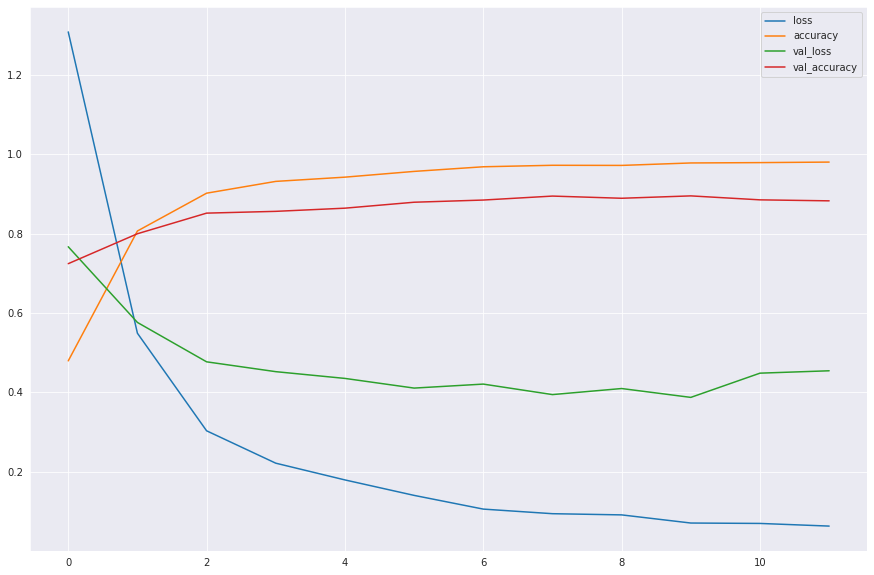

In [62]:
pd.DataFrame(rnn.history.history).plot(figsize=(15,10))

In [63]:
test_tweets,test_labels=test["text"],test["label"]
test_tweets

['im feeling rather rotten so im not very ambitious right now',
 'im updating my blog because i feel shitty',
 'i never make her separate from me because i don t ever want her to feel like i m ashamed with her',
 'i left with my bouquet of red and yellow tulips under my arm feeling slightly more optimistic than when i arrived',
 'i was feeling a little vain when i did this one',
 'i cant walk into a shop anywhere where i do not feel uncomfortable',
 'i felt anger when at the end of a telephone call',
 'i explain why i clung to a relationship with a boy who was in many ways immature and uncommitted despite the excitement i should have been feeling for getting accepted into the masters program at the university of virginia',
 'i like to have the same breathless feeling as a reader eager to see what will happen next',
 'i jest i feel grumpy tired and pre menstrual which i probably am but then again its only been a week and im about as fit as a walrus on vacation for the summer',
 'i don t

In [64]:
print(test_tweets[0],test_labels[0])

im feeling rather rotten so im not very ambitious right now sadness


In [65]:
test_tweets_latest=tokenizer.texts_to_sequences(test_tweets)
test_tweets_latest

[[17, 8, 203, 715, 15, 17, 26, 46, 5595, 114, 58],
 [17, 1, 11, 243, 37, 2, 3, 469],
 [2,
  145,
  80,
  68,
  2971,
  60,
  18,
  37,
  2,
  104,
  43,
  165,
  67,
  68,
  5,
  3,
  14,
  2,
  93,
  406,
  25,
  68],
 [2,
  172,
  25,
  11,
  1,
  10,
  873,
  4,
  5366,
  1,
  736,
  11,
  1518,
  8,
  351,
  38,
  608,
  95,
  34,
  2,
  1973],
 [2, 20, 8, 7, 56, 654, 34, 2, 127, 23, 71],
 [2, 131, 421, 106, 7, 1515, 1439, 153, 2, 39, 26, 3, 498],
 [2, 144, 974, 34, 33, 6, 228, 10, 7, 5667, 388],
 [2,
  962,
  161,
  2,
  9809,
  5,
  7,
  635,
  25,
  7,
  782,
  76,
  20,
  12,
  160,
  576,
  2771,
  4,
  1,
  865,
  6,
  1824,
  2,
  121,
  21,
  48,
  8,
  16,
  180,
  294,
  106,
  6,
  3471,
  1658,
  33,
  6,
  1858,
  10,
  3559],
 [2, 14, 5, 21, 6, 224, 1, 8, 29, 7, 1600, 723, 5, 113, 54, 59, 518, 292],
 [2,
  1,
  2,
  3,
  796,
  288,
  4,
  2369,
  1,
  108,
  2,
  338,
  24,
  19,
  125,
  129,
  79,
  118,
  48,
  7,
  202,
  4,
  17,
  27,
  29,
  1047,
  29,
  7,
 

In [66]:
test_labels2=le.transform(test_labels)
test_labels2

array([4, 4, 4, ..., 2, 2, 1])

In [67]:
test_tweets_latest2=pad_sequences(test_tweets_latest,truncating="post",padding="post",maxlen=60)
test_tweets_latest2.shape

(2000, 60)

In [68]:
test_labels2.shape

(2000,)

In [69]:
np.argmax(rnn.predict(np.expand_dims(test_tweets_latest2[0],axis=0)))

4

In [70]:
print(test_tweets[0],test_labels[0])

im feeling rather rotten so im not very ambitious right now sadness


In [71]:
test_labels2[0]

4

In [72]:
len(test_tweets_latest2)

2000